In [380]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
import warnings

## **Pregunta de Discusión: Eficacia de un Nuevo Tratamiento Médico**  

### **Contexto del problema:**  
- En un ensayo clínico, **200** pacientes fueron tratados con un nuevo fármaco para reducir la presión arterial.  
- **91** pacientes lograron una reducción significativa de la presión arterial.  
- Se esperaba que el tratamiento tuviera una eficacia del **50%**. Surge la pregunta: ¿Este resultado se debe al azar, o el fármaco es realmente menos efectivo de lo esperado?  

### **Hipótesis:**  
- **Hipótesis nula (H₀):** El **50%** de los pacientes obtiene una mejora significativa.  
- **Hipótesis alternativa (Hₐ):** Menos del **50%** de los pacientes obtiene una mejora significativa.  

### **Estadístico de prueba:**  
- Número de pacientes, de un total de **200**, que muestran una mejora significativa tras el tratamiento.  

### **Valor p:**  
- ¿Cuál es el valor p obtenido?  



- ¿Qué sucede si cambiamos el número de simulaciones?

- ¿Qué sucede si cambiamos el tamano de la muestra, por ejemplo
      el doble, 91*2, 200*2?, ¿Qué sucede con el p-value?

- ¿qué sucede cuando varían las características de nuestra población?  
    por ejemplo si la verdadera poblacion tiene un proporción de  0.45

  

In [439]:
# Funcion para simular el experimento
def simulacion(sample_size):      
    return np.random.choice(["T", "H"], sample_size)

In [440]:
# generar distribucion bajo la hipotesis nula
num_simulaciones = 1000
sample_size = 200
cuentas = make_array()
for i in range(num_simulaciones):
    sim = simulacion(sample_size)    
    num = np.count_nonzero(sim=="H")
    cuentas = np.append(cuentas, num)

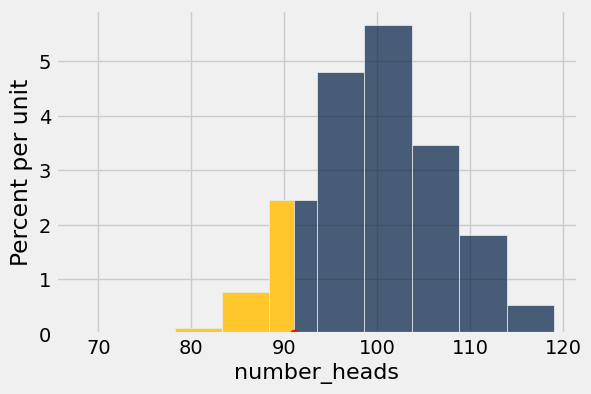

In [441]:
trials = Table().with_columns("number_heads", cuentas)
trials.hist(right_end=91)
plots.ylim()
plots.scatter(91, 0, color="red", s=40)

In [442]:
np.count_nonzero(cuentas <= 91)/len(cuentas)

0.11

# Cambios en el número de simulaciones

In [443]:
# generar distribucion bajo la hipotesis nula
def run_simulation(num_simulaciones=1000, sample_size=200, cut=91):
    cuentas = make_array()
    p_value = make_array()
    
    for i in range(num_simulaciones):
        sim = simulacion(sample_size)    
        num = np.count_nonzero(sim=="H")
        cuentas = np.append(cuentas, num)
        
    p = np.count_nonzero(cuentas <= cut)/len(cuentas)
    p_value=np.append(p_value, p)
    return p_value, cuentas

In [444]:
trials = Table(["N-sim", "p-value"])
for nsim in [100, 1000, 10000]:
    for i in range(0, 20):
        c,_ = run_simulation(num_simulaciones=nsim, sample_size=200)
        trials=trials.with_row([nsim, c])


In [445]:
trials.group("N-sim", np.mean)

N-sim,p-value mean
100,0.1175
1000,0.11745
10000,0.115725


(0.04, 0.19)

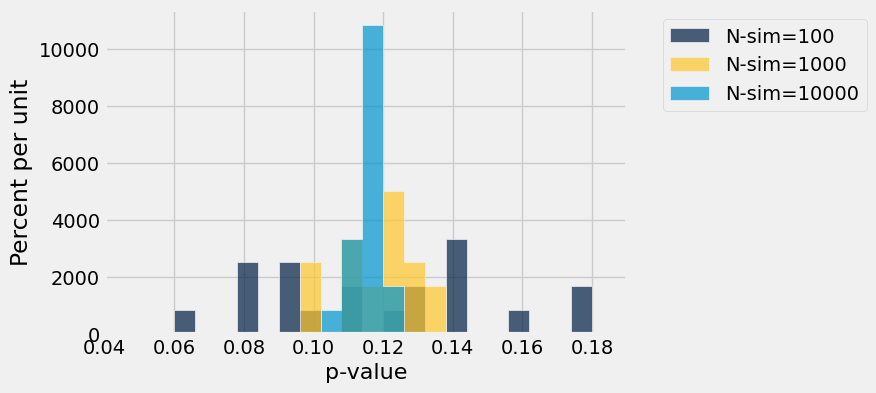

In [446]:
trials.hist(1,group="N-sim", bins=20)
plots.xlim(0.04, 0.19)

In [447]:
nsim=1000
c1,_1 = run_simulation(num_simulaciones=nsim, sample_size=200)
c2,_2 = run_simulation(num_simulaciones=nsim, sample_size=200)


In [448]:
tt = Table().with_columns("Expe1",_1, "Exper2",_2)

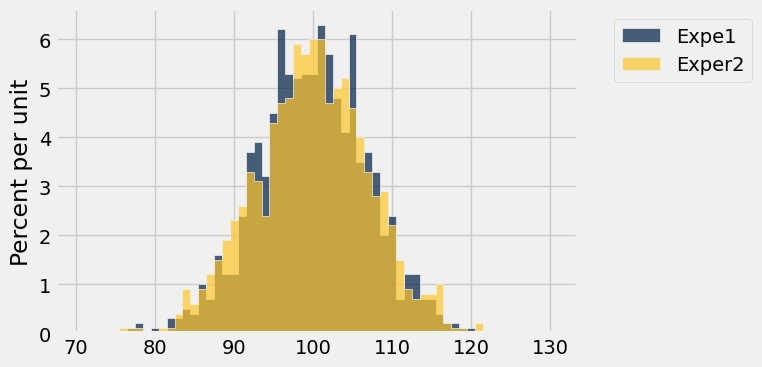

In [449]:
tt.hist(bins=np.arange(70.5, 131))

# ¿Qué sucede si cambiamos el tamaño de la muestra?

## **Cambiando el tamaño de la muestra**  

¡Esto es diferente de cambiar el número de simulaciones!  

Supongamos que ahora realizamos una prueba de sabor con **200 × 2 = 400** personas.  
Observamos que **91 × 2 = 182** de ellas prefieren *Super Soda*.  


In [450]:
trials = Table(["N-sim", "p-value"])
for nsim in [100, 1000, 10000]:
    for i in range(0, 20):
        c,_ = run_simulation(num_simulaciones=nsim, \
                             sample_size = 400, cut=91*2)
        trials=trials.with_row([nsim, c])


In [451]:
trials.group("N-sim",np.mean)

N-sim,p-value mean
100,0.043
1000,0.0421
10000,0.03938


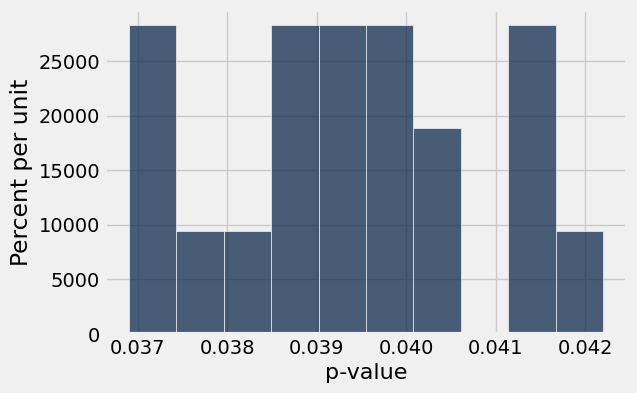

In [452]:
trials.where("N-sim", are.equal_to(10000)).hist("p-value")

Duplicar el tamano de la muestra no garantiza el p-value cambia significatimvanente

In [405]:
91/200

0.455

## **Explorando cambios en las características de la población**  

Usaremos simulaciones para analizar qué sucede cuando varían las características de nuestra población.  
Dado que conocemos la realidad sobre la población, podemos utilizar esta información para evaluar la precisión de nuestros resultados.  

Suponga que la verdadera población es de p = 0.45

In [573]:
# Suppose that the true proportion of people who prefer Super Soda is 45%
verdadera_poblacion = 0.45
distribucion_verdadera = make_array(verdadera_poblacion, 1 - verdadera_poblacion)
distribucion_verdadera

array([ 0.45,  0.55])

In [574]:
num_experimentos = 1
sample_size = 200
p = make_array()

a = sample_proportions(sample_size, distribucion_verdadera)*sample_size
qq=a.item(0)

In [575]:
u=[]
for k in np.arange(100):
    a = sample_proportions(sample_size, distribucion_verdadera)*sample_size
    qq=a.item(0)
    p, _ = run_simulation(num_simulaciones=10000, sample_size=200, cut=qq)
    u.append(p[0])
p_values=np.array(u)

(array([ 41.,  17.,  16.,   6.,   7.,   5.,   1.,   4.,   1.,   2.]),
 array([  2.00000000e-04,   8.85000000e-02,   1.76800000e-01,
          2.65100000e-01,   3.53400000e-01,   4.41700000e-01,
          5.30000000e-01,   6.18300000e-01,   7.06600000e-01,
          7.94900000e-01,   8.83200000e-01]),
 <BarContainer object of 10 artists>)

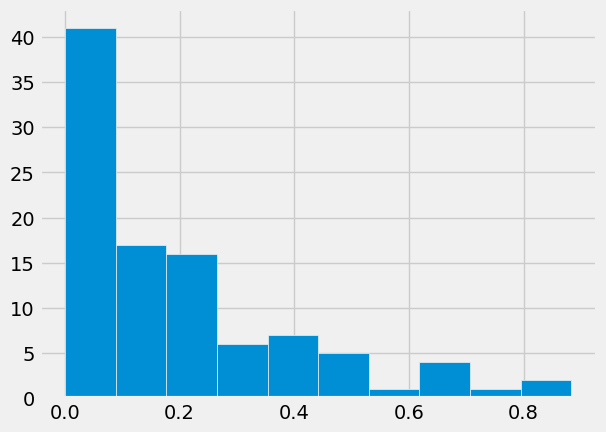

In [576]:
plots.hist(p_values)

In [572]:
np.mean(p_values <= 0.05)

1.0